In [2]:
#Load dependancies

import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

Using TensorFlow backend.


In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/trinakarmakar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import *
from gensim.models.phrases import Phraser, Phrases
from keras.preprocessing.text import one_hot

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/trinakarmakar/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/trinakarmakar/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [9]:
from nltk.corpus import gutenberg

In [10]:
gberg_sents = gutenberg.sents()

### NLP best practices

In [12]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [14]:
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

### Remove stopwords and punctuation

In [15]:
stopwords = stopwords.words('english') + list(string.punctuation)

In [16]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [17]:
[w.lower() for w in gberg_sents[4] if w not in stopwords]

['she',
 'youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

### Stem words

In [18]:
stemmer = PorterStemmer()

In [20]:
[stemmer.stem(w.lower()) for w in gberg_sents[4] if w not in stopwords]

['she',
 'youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

### Handle Bi-Grams

In [21]:
phrases = Phrases(gberg_sents)

In [22]:
bigrams = Phraser(phrases)

In [23]:
bigrams.phrasegrams

{(b'turn', b'back'): (15, 10.596023199431151),
 (b'king', b'Nebuchadnezzar'): (10, 19.557906388361797),
 (b'open', b'air'): (28, 43.91706393805037),
 (b'very', b'wroth'): (11, 19.265451713395638),
 (b'twelve', b'buns'): (7, 390.41729797979804),
 (b'your', b'doings'): (15, 19.956274524989674),
 (b'hath', b'purposed'): (7, 21.842298590753362),
 (b'inward', b'parts'): (6, 72.07703962703962),
 (b'Goddard', b"'"): (34, 15.29483969345862),
 (b'commit', b'whoredom'): (6, 350.578798185941),
 (b'holy', b'convocation'): (16, 811.3825143129772),
 (b'leaning', b'against'): (12, 23.700128657852233),
 (b'round', b'about'): (314, 66.37123898108463),
 (b'withered', b'away'): (8, 28.293956169648165),
 (b'buried', b'him'): (40, 10.212015743068294),
 (b'black', b'beard'): (7, 24.109980506822613),
 (b'eh', b'?"'): (7, 22.29990624549257),
 (b'fixed', b'on'): (31, 10.722857321964225),
 (b'found', b'herself'): (27, 11.22605649143189),
 (b'ever', b'since'): (60, 42.92801610440095),
 (b'quarter', b'-'): (31, 1

In [25]:
"Jon lives in New York City".split()

['Jon', 'lives', 'in', 'New', 'York', 'City']

In [26]:
bigrams["Jon lives in New York City".split()]

['Jon', 'lives', 'in', 'New_York', 'City']

### preprocess corpus

In [27]:
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w not in list(string.punctuation)])

In [28]:
lower_sents[:6]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period'],
 ['her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',
  'an',
 

In [29]:
lower_bigrams = Phraser(Phrases(lower_sents))

In [31]:
lower_bigrams.phrasegrams

{(b'turn', b'back'): (16, 10.061840177671076),
 (b'your', b'doings'): (15, 18.460566783831283),
 (b'ha', b'ha'): (16, 235.80548469387756),
 (b'enter', b'macbeth'): (16, 221.7866568914956),
 (b'very', b'wroth'): (11, 18.110271888251432),
 (b'i', b'm'): (438, 16.271042011107397),
 (b'twelve', b'buns'): (7, 376.2649253731343),
 (b'have', b'sinned'): (74, 32.241117104092524),
 (b'hath', b'purposed'): (7, 20.75410342166195),
 (b'inward', b'parts'): (6, 67.9050505050505),
 (b'mr', b'hopkins'): (17, 171.2037351443124),
 (b'commit', b'whoredom'): (6, 319.78541226215646),
 (b'holy', b'convocation'): (16, 601.0995303468208),
 (b'mrs', b'martin'): (8, 10.982447223684451),
 (b'chapter', b'vi'): (6, 126.36466165413533),
 (b'leaning', b'against'): (13, 24.29099376700023),
 (b'round', b'about'): (316, 62.401737088734784),
 (b'withered', b'away'): (8, 27.135219984751313),
 (b'open', b'air'): (29, 41.97349921376376),
 (b'black', b'beard'): (7, 21.958915544586798),
 (b'an', b'hebrew'): (10, 18.719995544

In [32]:
lower_bigrams["john lives in new york city".split()]

['john', 'lives', 'in', 'new_york', 'city']

In [39]:
lower_bigram = Phraser(Phrases(lower_sents, min_count=32, threshold=64))

In [40]:
lower_bigram.phrasegrams

{(b'afar', b'off'): (52, 108.14220347465505),
 (b'burnt', b'offering'): (184, 297.524653753951),
 (b'burnt', b'offerings'): (86, 299.15702343127646),
 (b'buster', b'bear'): (142, 479.87410772225826),
 (b'captain', b'benwick'): (56, 241.49037086312987),
 (b'captain', b'wentworth'): (196, 529.8756608388247),
 (b'charles', b'hayter'): (33, 92.03437785214481),
 (b'chief', b'priests'): (65, 116.31947753846512),
 (b'colonel', b'brandon'): (132, 1313.0078125),
 (b'couldn', b't'): (89, 171.76138536935215),
 (b'cut', b'off'): (217, 129.60290535032792),
 (b'dare', b'say'): (115, 89.94000515807346),
 (b'de', b'grey'): (77, 603.2109624246722),
 (b'didn', b't'): (180, 220.51081560283686),
 (b'doesn', b't'): (53, 106.2634985949418),
 (b'don', b't'): (830, 250.30957446808512),
 (b'dr', b'bull'): (65, 680.7870294599019),
 (b'dr', b'middleton'): (40, 162.73103819257668),
 (b'drawing', b'room'): (49, 84.91494947493561),
 (b'farmer', b'brown'): (100, 386.05179596892236),
 (b'father', b'brown'): (207, 91.

In [46]:
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigrams[s])

In [47]:
clean_sents[:10]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two_daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her_sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very_early',
  'period'],
 ['her_mother',
  'had',
  'died',
  'too',
  'long_ago',
  'for',
  'her',
  'to',
  'have',
  'more_than',
  'an',
  'indistinct',
  'remembrance'

In [48]:
clean_sents[7]

['between', '_them_', 'it', 'was', 'more', 'the', 'intimacy', 'of', 'sisters']

### Run word2vec on clean sentences

In [49]:
model = Word2Vec(sentences=clean_sents, size=64, sg=1, window=10, min_count=10, seed=42)

In [50]:
model.save('clean_gutenberg_model.wv')

In [52]:
len(model.wv.vocab)

11706

In [53]:
model['ma_am']

array([-0.04858869,  0.36076564,  0.07981845,  0.21081609, -0.23762009,
        0.4880414 , -0.48369831, -0.45556596,  0.02363503, -0.23403974,
        0.69423735, -0.36885884,  0.60525364,  0.05933821,  0.34991705,
       -0.28766793, -0.41667503,  0.19561255, -0.0140621 ,  0.29380286,
       -0.219762  ,  0.15585048, -0.56658769,  0.00157854,  0.68660825,
       -0.31079763,  0.45245725, -0.21194805, -0.76547605, -0.56206745,
       -0.01076392,  0.02370627, -0.07482009,  0.24295996,  0.23087229,
        0.0219647 ,  0.4312382 ,  0.19484524,  0.32456091, -0.02580466,
        0.00793569,  0.02113807, -0.13923231,  0.05504092, -0.17211543,
        0.61539543, -0.07655445, -0.38446286,  0.22682618,  0.25287065,
       -0.3489745 , -0.39114031, -0.34760907, -0.04899908,  0.04855516,
       -0.30715042,  0.45433044, -0.12757526,  0.15577513,  0.1921691 ,
        0.1592547 ,  0.42424175, -0.36395973,  0.37229887], dtype=float32)

In [55]:
model.most_similar(positive=['ma_am', 'man'], negative=['woman'])

[(',"_answered', 0.7752641439437866),
 ('professor', 0.7750279307365417),
 ('but', 0.7531249523162842),
 ('turnbull', 0.748522162437439),
 ('doctor', 0.7481015920639038),
 ('policeman', 0.7387113571166992),
 (",'_alice", 0.7375919818878174),
 ('macian', 0.7372395992279053),
 ('gravely', 0.7328001260757446),
 ('father_brown', 0.7252722978591919)]

In [57]:
model.most_similar(positive=['father', 'woman'], negative=['man'])

[('sister', 0.7910828590393066),
 ('daughter', 0.7354176044464111),
 ('wife', 0.7260904312133789),
 ('mother', 0.7237927913665771),
 ('husband', 0.7067923545837402),
 ('sarah', 0.6846858263015747),
 ('brother', 0.6779183149337769),
 ('handmaid', 0.6719396114349365),
 ('younger', 0.6707202196121216),
 ('loved', 0.6704767942428589)]

In [58]:
X = model[model.wv.vocab]

In [59]:
tsne = TSNE(n_components=2, n_iter=1000)

In [60]:
x_2d = tsne.fit_transform(X)

In [61]:
coords_df = pd.DataFrame(x_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.vocab.keys()
coords_df.head()
coords_df.to_csv('clean_gutenberg_tsne.csv', index=False)

In [62]:
coords_df = pd.read_csv('clean_gutenberg_tsne.csv')

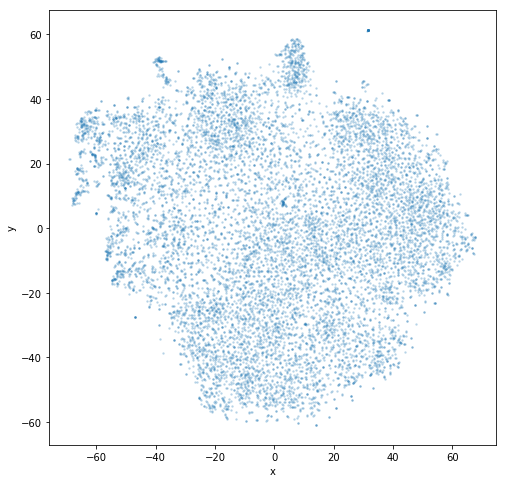

In [63]:
_ = coords_df.plot.scatter('x', 'y', figsize=[8,8], 
                           marker='.', s = 10, alpha=0.2)

In [64]:
output_notebook()

Loading BokehJS ...

In [65]:
subset_df = coords_df.sample(n=5000)

In [66]:
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y = subset_df.y, text = subset_df.token)

In [67]:
show(p)

In [68]:
output_file()

NameError: name 'output_file' is not defined